# HOMEWORK 3

For this homework you are going to implement the **unsharp masking** filter (USM). It is a technique to improve the sharpness of an image by combining the image with its blurred (unsharp) version. See the Wikipedia [page](https://en.wikipedia.org/wiki/Unsharp_masking) for more details.

### Unsharp Masking (USP)
The USM technique consists of the following steps:
* Load the image you will be working with.
* Create a blurred (unsharp) version of the original image.
* Add the unsharp image (with a certain **weight**) to the original.

To sum it up, the USM performs the following operation:

`sharpened = original + (original − unsharp) × amount`

Even though we provide you an image to work with, you are welcome to use your own images :-)

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

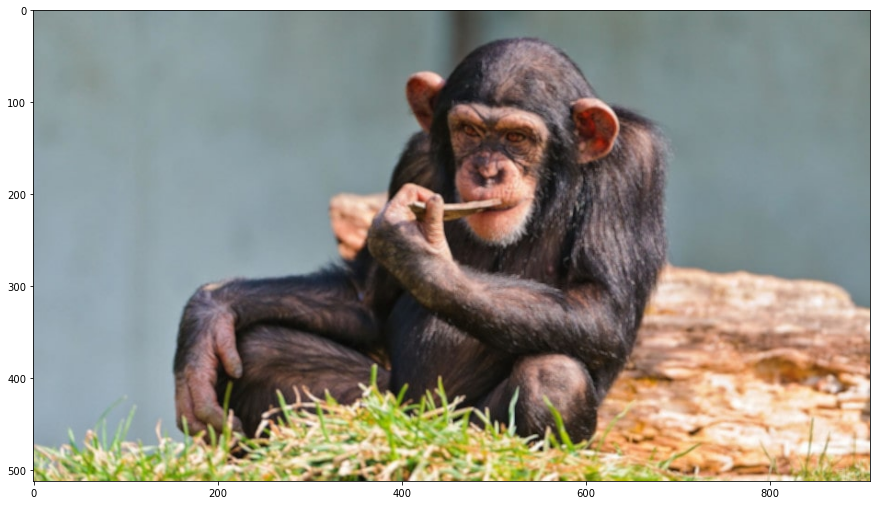

In [2]:
original = cv2.imread('./data/shimp-min.jpg')
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
plt.imshow(original)

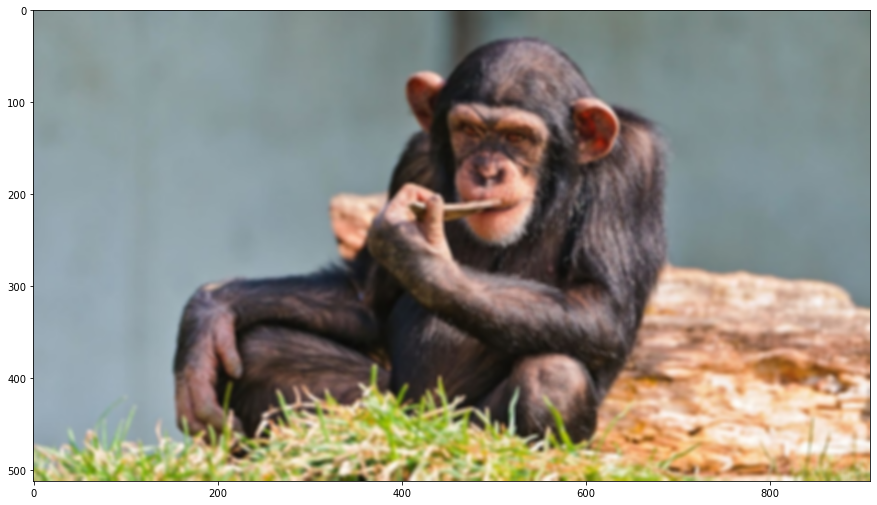

In [3]:
# Create a blurred (unsharp) version of the original image (you can use Gaussian blurring)
unsharp = cv2.GaussianBlur(original, ksize=(5,5), sigmaX=5)
plt.imshow(unsharp)

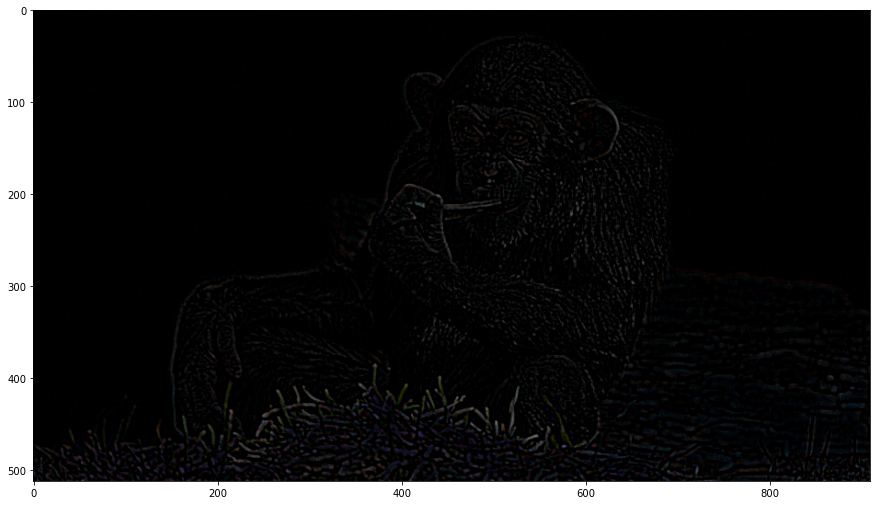

In [4]:
# Create the difference image (original − unsharp)
# Note: Remember that you are working with uint8 data types. Any addition or substractions
# might result in overflow or underflow, respectively. You can prevent this by casting the images to float.
amount = 2.1
diff = (original.astype(np.float32) - unsharp.astype(np.float32)) * amount

# Let`s watch the difference
visible_diff = np.maximum(diff, np.zeros(diff.shape))
visible_diff = np.minimum(visible_diff, 255 * np.ones(visible_diff.shape))
visible_diff = visible_diff.round().astype(np.uint8)

plt.imshow(visible_diff)

(<AxesSubplot:title={'center':'Sharpened'}>,
 Text(0.5, 1.0, 'Sharpened'))

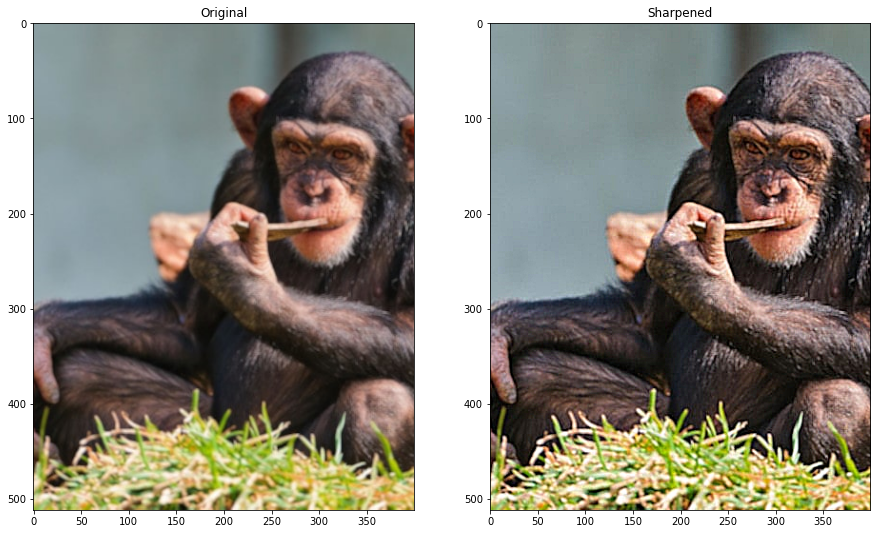

In [5]:
# Apply USM to get the resulting image using `sharpened = original + (original − unsharp) × amount`
# Note: Again, take care of underflows/overflows if necessary.
sharpened = original + diff
sharpened = np.maximum(sharpened, np.zeros(sharpened.shape))
sharpened = np.minimum(sharpened, 255 * np.ones(sharpened.shape))
sharpened = sharpened.round().astype(np.uint8)

plt.subplot(121), plt.imshow(original[0:600, 200:600, :]), plt.title('Original')
plt.subplot(122), plt.imshow(sharpened[0:600, 200:600, :]), plt.title('Sharpened')

### Questions
* What is a good (reasonable) value for the `amount` parameter?

`I think it is in the range from 1.5 to 2.5`
 * What happens if it is too small?
 
`The difference becomes more not noticeable`
 * What happens if it is too large?
 
`When the value is bigger, the picture looks rather like a drawing`